In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import itertools
%matplotlib inline

In [2]:
dataset=pd.read_csv('Concrete_Data.csv')

In [3]:
dataset=dataset.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
            'Fly Ash (component 3)(kg in a m^3 mixture)':'fly ash',
            'Water  (component 4)(kg in a m^3 mixture)':'water',
            'Superplasticizer (component 5)(kg in a m^3 mixture)':'SP',
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CA',
            'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FA',
            'Age (day)':'age',
            'Concrete compressive strength(MPa, megapascals)':'strength'})

In [4]:
dataset.shape

(1030, 9)

## checking null values in dataframe

In [5]:
dataset[dataset.isnull().any(axis=1)]

,cement,slag,fly ash,water,SP,CA,FA,age,strength


In [6]:
dataset.isnull().sum()

cement      0
slag        0
fly ash     0
water       0
SP          0
CA          0
FA          0
age         0
strength    0
dtype: int64

In [7]:
dataset.describe()

,cement,slag,fly ash,water,SP,CA,FA,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## checking correlation between features

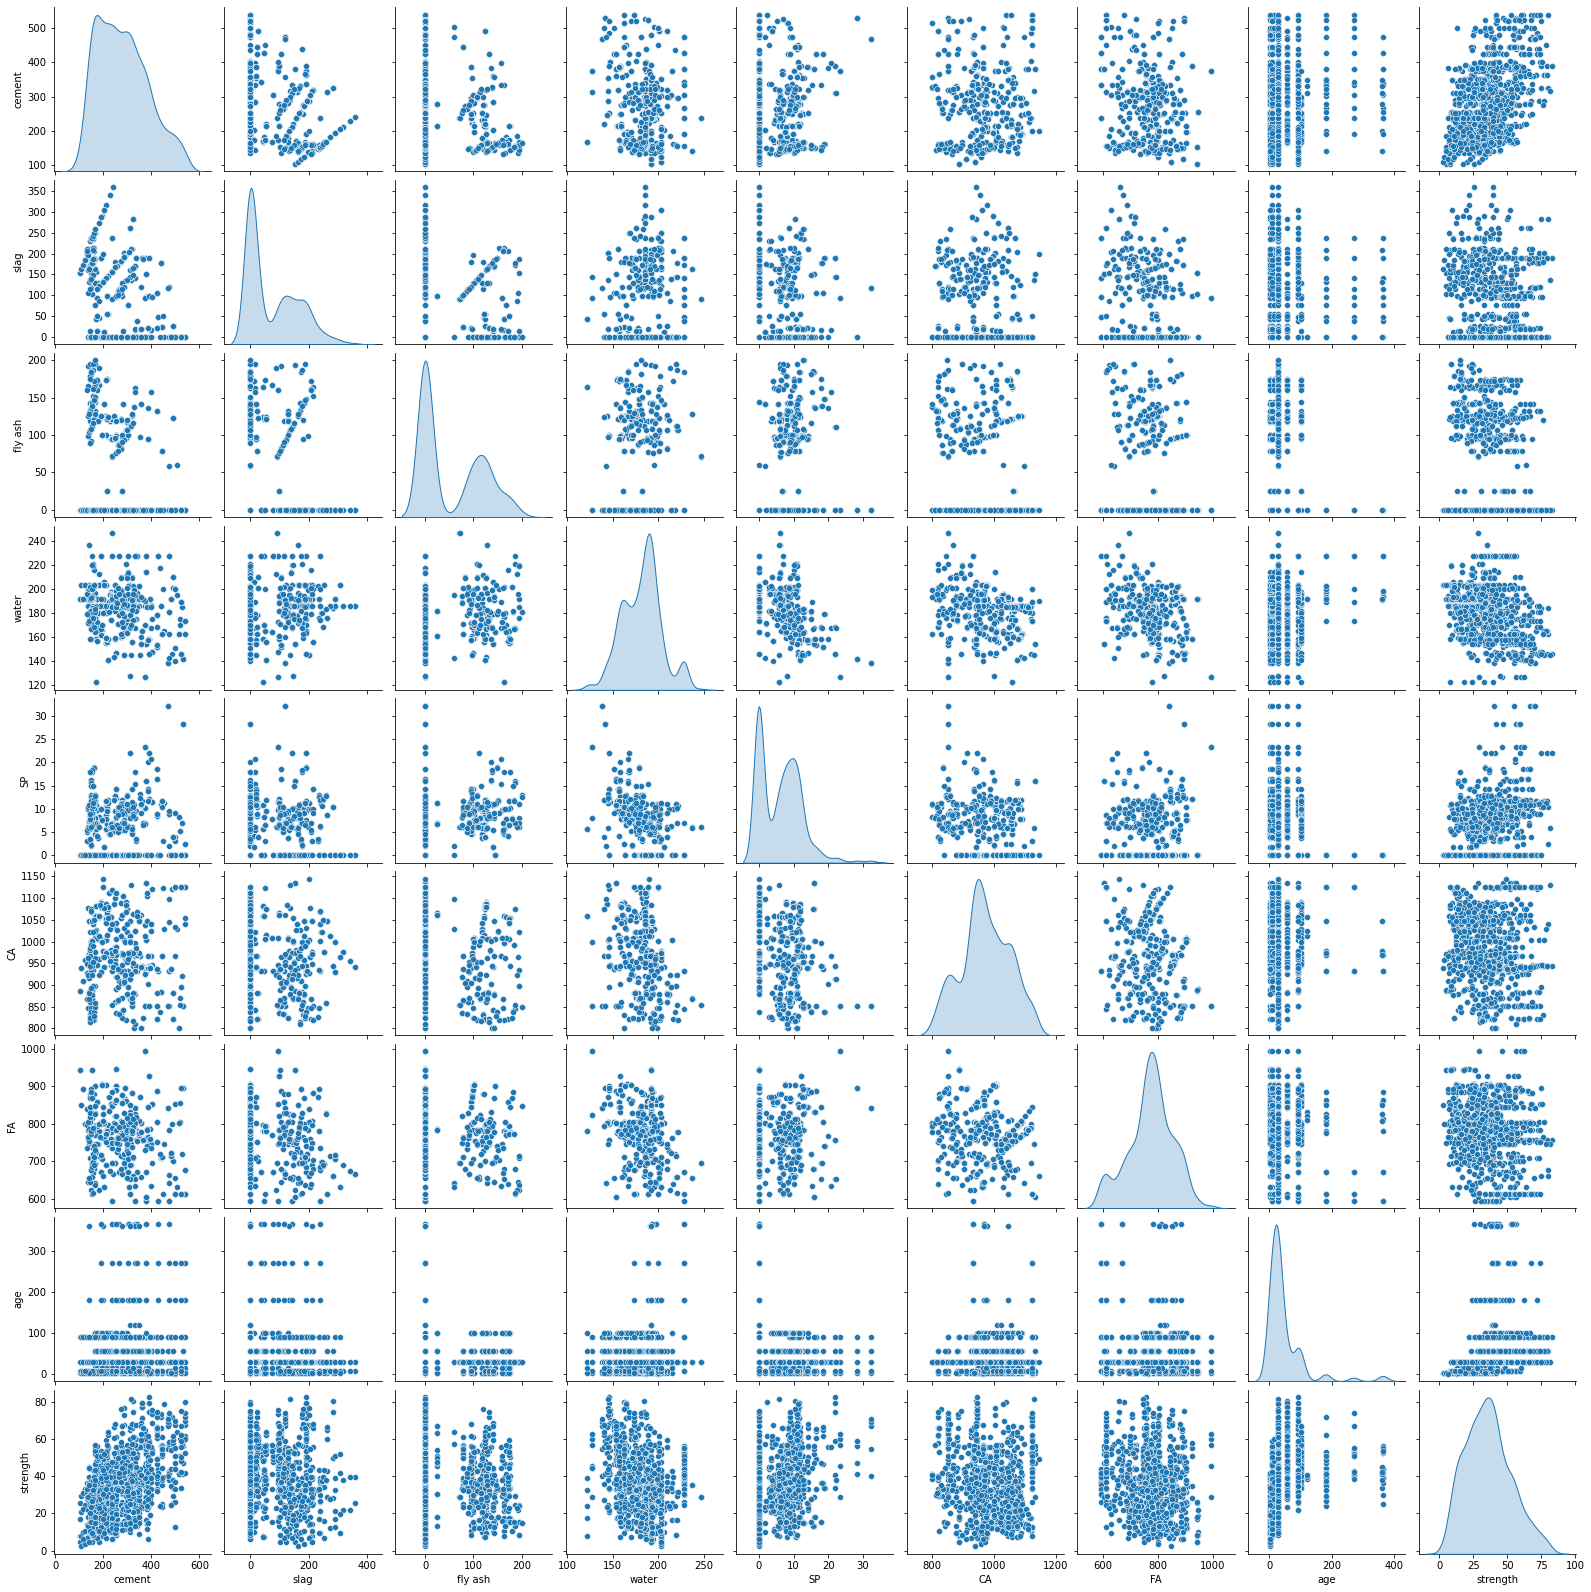

In [8]:
sbn.pairplot(dataset, diag_kind='kde')

Text(0.5, 1.0, 'correlation b/w features')

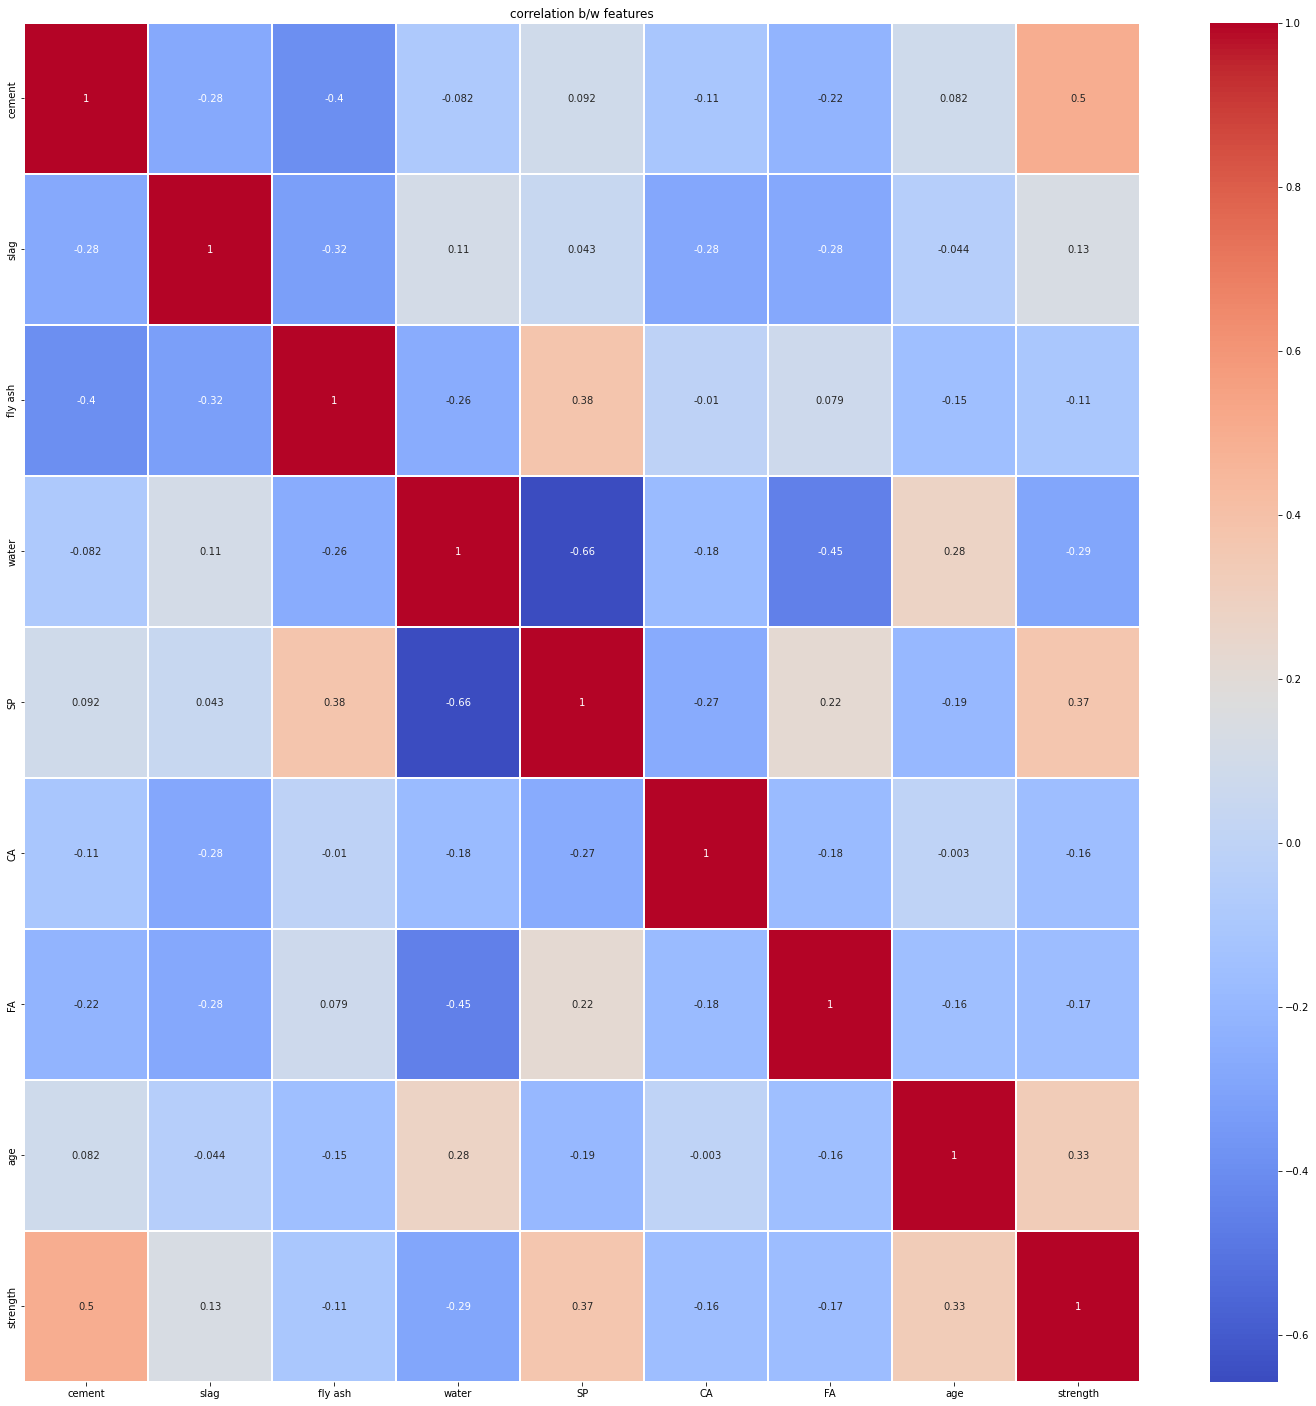

In [9]:
plt.figure(figsize=(25,25))
sbn.heatmap(dataset.corr(),cmap='coolwarm',annot=True,linewidth=2)
plt.title('correlation b/w features')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

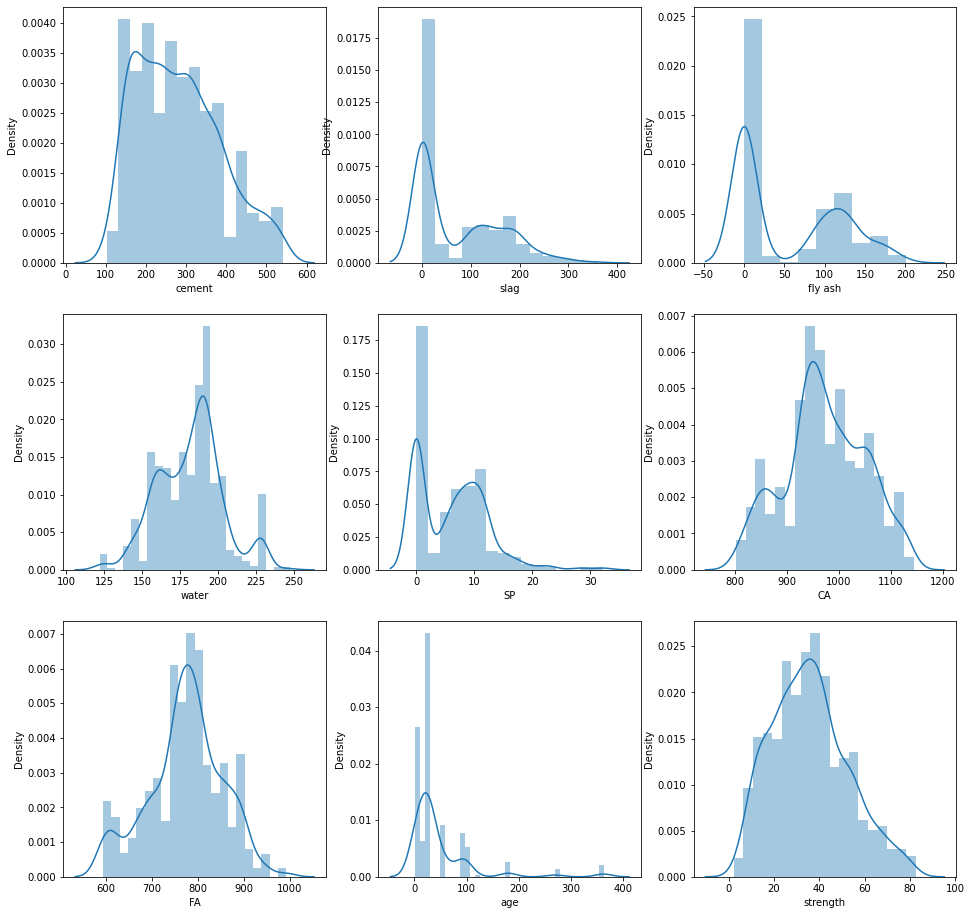

In [10]:
fig,allDistPlots=plt.subplots(3,3,figsize=(16,16))
i=0
j=0
for feature in dataset.columns:
    sbn.distplot(dataset[feature],ax=allDistPlots[i][j])
    j+=1
    if(j>2):
        i+=1
        j=0

## checking outliers in data

<AxesSubplot:>

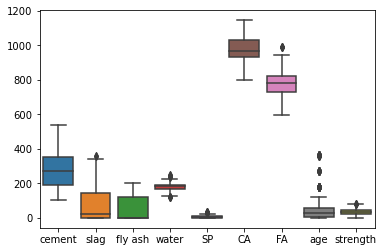

In [11]:
sbn.boxplot(data=dataset)

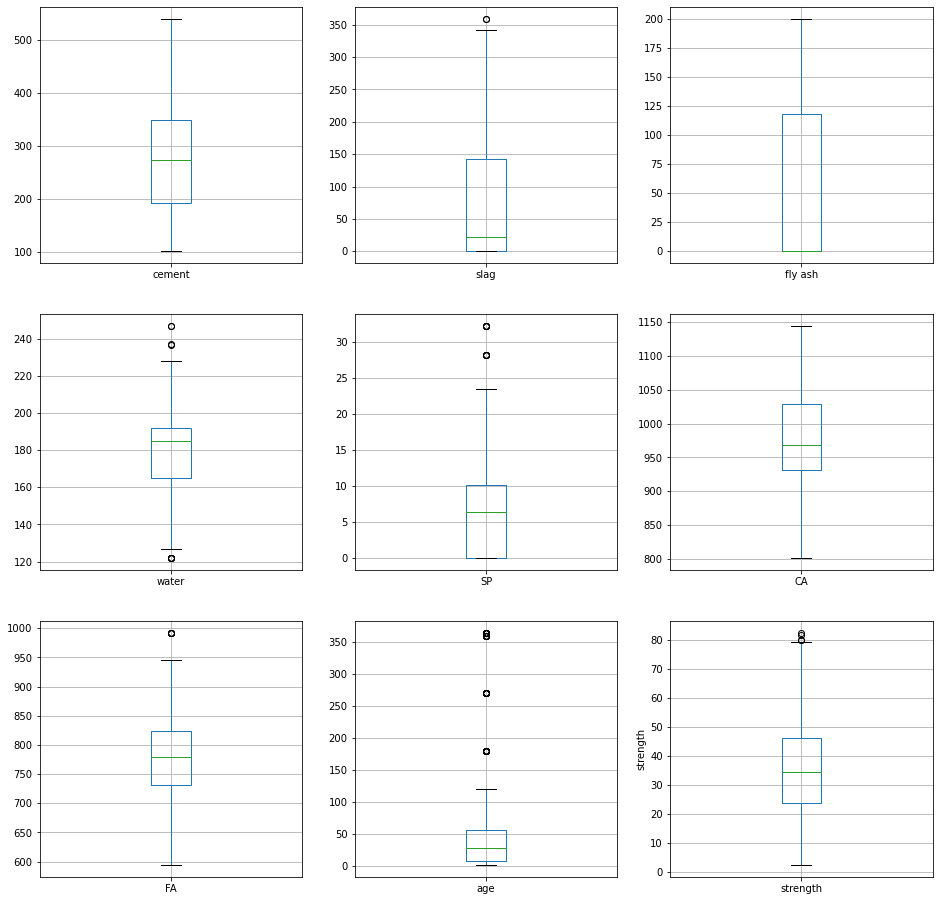

In [12]:
fig,allBoxPlots=plt.subplots(3,3,figsize=(16,16))
i=0
j=0
for feature in dataset.columns:
    dataset.boxplot(feature,ax=allBoxPlots[i][j])
    plt.ylabel(feature)
    j+=1
    if(j>2):
        i+=1
        j=0

In [13]:
for feature in dataset.columns:
    print("Outliers in ",feature," are: ",
          dataset[(((dataset[feature]-dataset[feature].mean())/dataset[feature].std()).abs()>3)][feature].count())

Outliers in  cement  are:  0
Outliers in  slag  are:  4
Outliers in  fly ash  are:  0
Outliers in  water  are:  2
Outliers in  SP  are:  10
Outliers in  CA  are:  0
Outliers in  FA  are:  0
Outliers in  age  are:  33
Outliers in  strength  are:  0


### Removing outliers

##### Here we are not considering outliers in "age"

In [14]:
# (x-mew)/(sigma)<=+3
left_lim_slag=-3*dataset["slag"].std()+dataset["slag"].mean()
print("left_lim_slag is:",left_lim_slag)

left_lim_water=-3*dataset["water"].std()+dataset["water"].mean()
print("left_lim_water is:",left_lim_water)

left_lim_SP=-3*dataset["SP"].std()+dataset["SP"].mean()
print("left_lim_SP is:",left_lim_SP)
left_lim_Age=-3*dataset['age'].std()+dataset['age'].mean()
print("left_lim_Age is:",left_lim_Age)

left_lim_slag is: -184.9422000015981
left_lim_water is: 117.50462585830046
left_lim_SP is: -11.716863983281762
left_lim_Age is: -143.84759882076938


In [15]:
# (x-mew)/(sigma)>=-3
right_lim_slag=3*dataset["slag"].std()+dataset["slag"].mean()
print("right_lim_slag is:",right_lim_slag)

right_lim_water=3*dataset["water"].std()+dataset["water"].mean()
print("right_lim_water is",right_lim_water)

right_lim_SP=3*dataset["SP"].std()+dataset["SP"].mean()
print("right_lim_SP is",right_lim_SP)
right_lim_Age=3*dataset['age'].std()+dataset['age'].mean()
print("left_lim_Age is:",right_lim_Age)

right_lim_slag is: 332.733850487035
right_lim_water is 245.6299372484956
right_lim_SP is 24.126184371631275
left_lim_Age is: 235.17187066542957


In [16]:
dataset.describe()

,cement,slag,fly ash,water,SP,CA,FA,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [17]:
dataset=dataset[(dataset.slag>=left_lim_slag) & (dataset.slag<=right_lim_slag)]
dataset=dataset[(dataset.water>=left_lim_water) & (dataset.water<=right_lim_water)]
dataset=dataset[(dataset.SP>=left_lim_SP) & (dataset.SP<=right_lim_SP)]
dataset=dataset[(dataset.age>=left_lim_Age) & (dataset.age<=right_lim_Age)]

In [18]:
dataset.shape

(981, 9)

In [19]:
dataset.describe()

,cement,slag,fly ash,water,SP,CA,FA,age,strength
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,277.489399,73.106218,56.749745,180.760041,6.194495,974.729256,776.003976,36.448522,35.294220
std,102.594951,85.197793,64.439192,20.139643,5.486470,77.765000,77.651828,36.871075,16.733154
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,739.000000,7.000000,23.220000
50%,266.000000,22.000000,0.000000,184.000000,6.700000,968.000000,780.000000,28.000000,33.690000
75%,349.000000,144.200000,118.300000,192.000000,10.300000,1038.000000,822.200000,28.000000,45.300000
max,540.000000,316.100000,200.100000,237.000000,23.400000,1145.000000,992.600000,180.000000,82.600000


# Classifying data into dependent and independent features

In [20]:
x=dataset.iloc[:,:-1]
xc=x
y=dataset.iloc[:,-1]
print(x)

      cement   slag  fly ash  water    SP      CA     FA  age
0      540.0    0.0      0.0  162.0   2.5  1040.0  676.0   28
1      540.0    0.0      0.0  162.0   2.5  1055.0  676.0   28
5      266.0  114.0      0.0  228.0   0.0   932.0  670.0   90
7      380.0   95.0      0.0  228.0   0.0   932.0  594.0   28
8      266.0  114.0      0.0  228.0   0.0   932.0  670.0   28
...      ...    ...      ...    ...   ...     ...    ...  ...
1025   276.4  116.0     90.3  179.6   8.9   870.1  768.3   28
1026   322.2    0.0    115.6  196.0  10.4   817.9  813.4   28
1027   148.5  139.4    108.6  192.7   6.1   892.4  780.0   28
1028   159.1  186.7      0.0  175.6  11.3   989.6  788.9   28
1029   260.9  100.5     78.3  200.6   8.6   864.5  761.5   28

[981 rows x 8 columns]


# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Splitting train test data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Building different Models

## 1. Multiple linear regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [24]:
model_lr.coef_

array([11.6951872 ,  7.80042931,  4.34985269, -3.32488876,  2.06506794,
        0.38129611,  0.65130592,  8.41533996])

In [25]:
model_lr.intercept_

35.31490711682792

In [26]:
training_score_lr=model_lr.score(x_train,y_train)*100
training_score_lr

71.39785093921272

In [27]:
y_pred_lr = model_lr.predict(x_test)

In [28]:
MSE_lr=mean_squared_error(y_test,y_pred_lr)
MSE_lr

93.68750991683387

In [29]:
acc_lr = r2_score(y_test,y_pred_lr)*100
acc_lr

66.047145113724

##### Maintaing a result dataframe of various Algorithm and their Accuracy

In [30]:
Results=pd.DataFrame({'Algorithm':'Multiple linear regression','Accuracy':acc_lr},index={1})
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145


## 2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model_rf=RandomForestRegressor()

In [33]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
training_score_rf=model_rf.score(x_train,y_train)*100
training_score_rf

98.4404531742685

In [35]:
testing_score_rf=model_rf.score(x_test,y_test)*100
testing_score_rf

89.41746463123901

In [36]:
y_pred_rf=model_rf.predict(x_test)

In [37]:
acc_rf=r2_score(y_test,y_pred_rf)*100 # r2 score=1-(SSr/SSm)
acc_rf

89.41746463123901

In [38]:
MSE_rf=mean_squared_error(y_test,y_pred_rf)
MSE_rf

29.200825398243392

In [39]:
Results.loc[2]=['Random Forest',acc_rf]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465


## 3. KFold cross validation on random forest

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
kfold = KFold(n_splits=30,shuffle=True,random_state=3)
res_kfold_rf = cross_val_score(model_rf, x, y, cv=kfold)
res_kfold_rf

array([0.92780494, 0.85595864, 0.91386818, 0.93258932, 0.91222207,
       0.93073213, 0.83564505, 0.9392427 , 0.7942165 , 0.93485806,
       0.9339962 , 0.93201043, 0.92801996, 0.92854489, 0.93626055,
       0.93412803, 0.91124939, 0.78757488, 0.94861798, 0.92548146,
       0.93882418, 0.93009324, 0.95739515, 0.92713468, 0.94653034,
       0.90479772, 0.86582909, 0.96333584, 0.88823992, 0.92981797])

In [42]:
acc_kfold_rf = res_kfold_rf.mean()*100
acc_kfold_rf

91.31673160752992

In [43]:
Results.loc[3]=['Random forest KFold',acc_kfold_rf]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732


## 4. KNN Regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor

diff_k=[]
for i in range(1,100,2):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

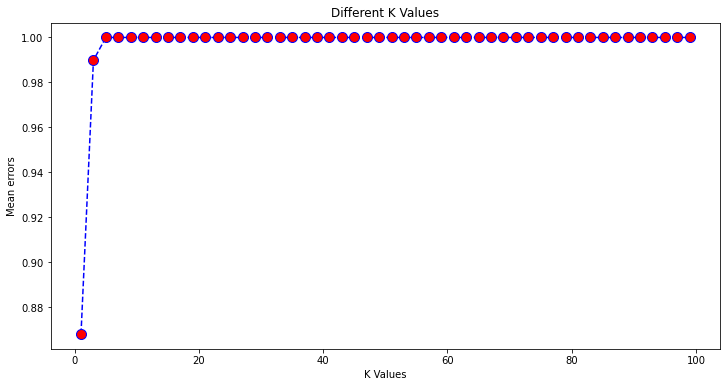

In [45]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100,2),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [46]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred_knn = model_knn.predict(x_test)

In [48]:
training_score_knn=model_knn.score(x_train, y_train)*100
training_score_knn

87.82711205950308

In [49]:
testing_score_knn=model_knn.score(x_test,y_test)*100
testing_score_knn

77.0726879210377

In [50]:
acc_knn=r2_score(y_test, y_pred_knn)*100
acc_knn

77.0726879210377

In [51]:
Results.loc[4]=['KNN Regressor',acc_knn]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688


## 5. Support Vector Machine

In [52]:
from sklearn.svm import SVR
model_svm = SVR(kernel='rbf')
model_svm.fit(x_train, y_train)

SVR()

In [53]:
y_pred_svm = model_svm.predict(x_test)

In [54]:
model_svm.score(x_train, y_train)

0.7261491754778845

In [55]:
acc_svm=r2_score(y_test, y_pred_svm)*100
acc_svm

67.39189021758708

In [56]:
MSE_svm=mean_squared_error(y_test, y_pred_svm)
MSE_svm

89.97689940482334

In [57]:
Results.loc[5]=['Support Vector Machine',acc_svm]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688
5,Support Vector Machine,67.391890


## 6. KFold Support Vector Machine

In [58]:
k=20
kfold = KFold(n_splits=20,shuffle=True,random_state=3)
res_kfold_svm = cross_val_score(model_svm, x, y, cv=kfold)
res_kfold_svm

array([0.77611987, 0.70762024, 0.73190663, 0.59364017, 0.64075807,
       0.74105837, 0.66952248, 0.70562779, 0.78322244, 0.64511183,
       0.76975915, 0.71873855, 0.7166705 , 0.82673423, 0.71054724,
       0.74784129, 0.6495777 , 0.70879504, 0.71588679, 0.71213257])

In [59]:
acc_kfold_svm = res_kfold_svm.mean()*100
acc_kfold_svm

71.35635460547518

In [60]:
Results.loc[6]=['KFold Support Vector Machine',acc_kfold_svm]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688
5,Support Vector Machine,67.391890
6,KFold Support Vector Machine,71.356355


## 7. Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
model_dec=DecisionTreeRegressor()
model_dec.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
xc

,cement,slag,fly ash,water,SP,CA,FA,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [63]:
print('Feature importance: \n',pd.DataFrame(model_dec.feature_importances_,columns=['Importance'],index=xc.columns))

Feature importance: 
          Importance
cement     0.357973
slag       0.082807
fly ash    0.012389
water      0.063824
SP         0.079040
CA         0.034262
FA         0.038090
age        0.331615


In [64]:
y_pred_dt=model_dec.predict(x_test)
y_pred_dt

array([22.75 , 28.99 , 63.14 , 22.44 , 32.84 , 67.8  , 55.5  , 32.1  ,
       55.55 , 39.09 , 47.72 , 37.68 , 16.26 , 23.25 , 34.68 , 37.27 ,
       32.53 , 21.18 , 39.6  , 41.54 , 11.47 , 36.8  , 45.08 , 39.58 ,
       31.88 , 20.59 ,  8.06 , 26.85 ,  9.74 , 32.4  , 42.64 , 38.66 ,
       13.52 , 56.85 , 34.68 , 32.84 , 31.81 , 22.72 , 22.95 , 32.72 ,
       64.3  , 49.19 ,  9.13 , 24.9  , 26.85 , 37.72 , 23.85 , 48.7  ,
       39.27 , 64.9  , 30.12 , 43.58 , 26.2  , 34.74 , 66.42 , 19.2  ,
       31.42 , 23.74 , 48.4  , 46.68 , 44.39 , 31.35 , 32.1  , 31.02 ,
       39.36 , 35.23 , 19.54 , 35.1  , 32.66 , 56.1  , 39.   , 45.3  ,
       67.765, 17.54 , 37.23 , 59.8  , 11.39 ,  9.56 , 71.3  , 19.01 ,
       71.3  , 71.7  , 23.85 , 71.3  , 35.34 , 29.73 ,  9.87 , 18.42 ,
       39.61 , 38.33 , 33.49 , 14.31 , 18.13 , 42.23 , 44.39 , 10.09 ,
       32.72 , 19.99 , 29.59 , 12.84 , 13.52 , 29.73 , 24.185, 44.28 ,
       32.9  , 35.3  , 13.2  , 51.06 , 22.35 , 74.19 , 17.17 , 43.5  ,
      

In [65]:
model_dec.score(x_train,y_train)

0.9960408224039703

In [66]:
model_dec.score(x_test,y_test)

0.7820506026744682

In [67]:
acc_dt=r2_score(y_pred_dt,y_test)*100
acc_dt

77.19004335203061

In [68]:
Results.loc[7]=['Decision Tree Regressor',acc_dt]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688
5,Support Vector Machine,67.391890
6,KFold Support Vector Machine,71.356355
7,Decision Tree Regressor,77.190043


## 8. KFold Decision Tree Regressor

In [69]:
k=30
kfold_dt=KFold(n_splits=k,shuffle=True,random_state=5)
res_kfold_dt=cross_val_score(model_dec,x,y,cv=kfold_dt)
res_kfold_dt

array([0.88407777, 0.91068775, 0.83618566, 0.7301526 , 0.92565201,
       0.79087991, 0.91113554, 0.86107755, 0.88148158, 0.90410243,
       0.94608334, 0.83708561, 0.7697068 , 0.87289702, 0.91064505,
       0.93277117, 0.95383974, 0.88727293, 0.42865346, 0.52851659,
       0.81891136, 0.92066581, 0.80738396, 0.88529745, 0.94925984,
       0.86972066, 0.87629845, 0.90400298, 0.80683532, 0.84740289])

In [70]:
acc_kfold_dt=res_kfold_dt.mean()*100
acc_kfold_dt

84.62894415672703

In [71]:
Results.loc[8]=['KFold Decision Tree Regressor',acc_kfold_dt]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688
5,Support Vector Machine,67.391890
6,KFold Support Vector Machine,71.356355
7,Decision Tree Regressor,77.190043
8,KFold Decision Tree Regressor,84.628944


## Feature Selection

In [72]:
dataset2=dataset.copy()

In [73]:
X=dataset2.iloc[:,:-1]
X=X.drop(['fly ash','CA','FA'],axis=1)
Y=dataset2.iloc[:,-1]
xc=X

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [75]:
new_dec_model=DecisionTreeRegressor()
new_dec_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [76]:
print('Feature importance: \n',pd.DataFrame(new_dec_model.feature_importances_,columns=['Importance'],index=xc.columns))

Feature importance: 
         Importance
cement    0.389065
slag      0.106871
water     0.083654
SP        0.084870
age       0.335539


In [77]:
y_pred_NewDt=new_dec_model.predict(x_test)

In [78]:
new_model_acc=r2_score(y_pred_NewDt,y_test)*100
new_model_acc

83.13843879309356

In [79]:
Results.loc[9]=['Decision Tree Regressor 2',new_model_acc]
Results

,Algorithm,Accuracy
1,Multiple linear regression,66.047145
2,Random Forest,89.417465
3,Random forest KFold,91.316732
4,KNN Regressor,77.072688
5,Support Vector Machine,67.391890
6,KFold Support Vector Machine,71.356355
7,Decision Tree Regressor,77.190043
8,KFold Decision Tree Regressor,84.628944
9,Decision Tree Regressor 2,83.138439


## Pruning Decision Tree

In [80]:
X=dataset.drop(['strength'],axis=1)
xc=X
Y=dataset['strength']

In [81]:
from scipy import stats
Xscaled=stats.zscore(X)
Xscaled_df=pd.DataFrame(Xscaled,columns=dataset.columns)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,Y,test_size=0.3,random_state=5)

In [83]:
dt_prun_model=tree.DecisionTreeRegressor(max_depth=4,random_state=1,min_samples_leaf=5)
dt_prun_model.fit(x_train,y_train)

NameError: name 'tree' is not defined

In [ ]:
print('Feature importance: \n',pd.DataFrame(dt_prun_model.feature_importances_,columns=['Importance'],index=xc.columns))

In [ ]:
y_pred_PrunDt=dt_prun_model.predict(x_test)

In [ ]:
prun_dt_acc=r2_score(y_pred_PrunDt,y_test)*100
prun_dt_acc

In [ ]:
Results.loc[10]=['Pruning Decision Tree Regressor',prun_dt_acc]
Results

## Plotting Decision Tree

In [ ]:
Xscaled_df=Xscaled_df.drop('strength',axis=1)

In [ ]:
feature_cols=Xscaled_df.columns
feature_cols

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,18))
_=tree.plot_tree(dt_prun_model,feature_names=feature_cols,class_names={0:'Malignant',1:'Benign'},filled=True,fontsize=14)

In [ ]:
fig=plt.figure(figsize=(20,10))

In [ ]:
plt.bar(Results['Algorithm'],Results['Accuracy'])
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()